In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from pillar_project.data_utils.dataset import Scoreset

pd.set_option('display.max_columns', 500)

In [2]:
data_dir = Path("/data/dzeiberg/pillar_project")
data = pd.read_csv(data_dir / "dataframe" / "pillar_data_condensed_01_28_25.csv")

/tmp/ipykernel_4095620/24565981.py:2: DtypeWarning: Columns (4,7,8,11,15,21,22,23,29,34,37,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_dir / "dataframe" / "pillar_data_condensed_01_28_25.csv")


In [3]:
dataset = Scoreset(data[data.Dataset == "BARD1_unpublished"])

Q1: -0.521283913832757, Q3: 1.523358286159884, IQR: 2.0446421999926407, Lowerbound: -6.65521051381068, Upperbound: 7.6572848861378064
Removing 3 outliers
206552     -8.87636
206566   -20.701635
206583   -23.137369
Name: auth_reported_score, dtype: object
206552                             NaN
206566          Uncertain_significance
206583    Pathogenic/Likely_pathogenic
Name: clinvar_sig, dtype: object


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualize(dataset):
    fig,ax = plt.subplots(1,1 + dataset.n_samples,figsize=((1 + dataset.n_samples)*5,5),sharey=True,sharex=True)
    for sampleNum,(sample_scores,sample_name) in enumerate(dataset.samples):
        sns.histplot(sample_scores,ax=ax[sampleNum],stat="density",label=f"{sample_name} n={len(sample_scores):,d}")
        ax[sampleNum].legend()
    sns.histplot(dataset.scores,ax=ax[-1],stat="density",label=f"all n={len(dataset.scores):,d}")
    ax[-1].legend()

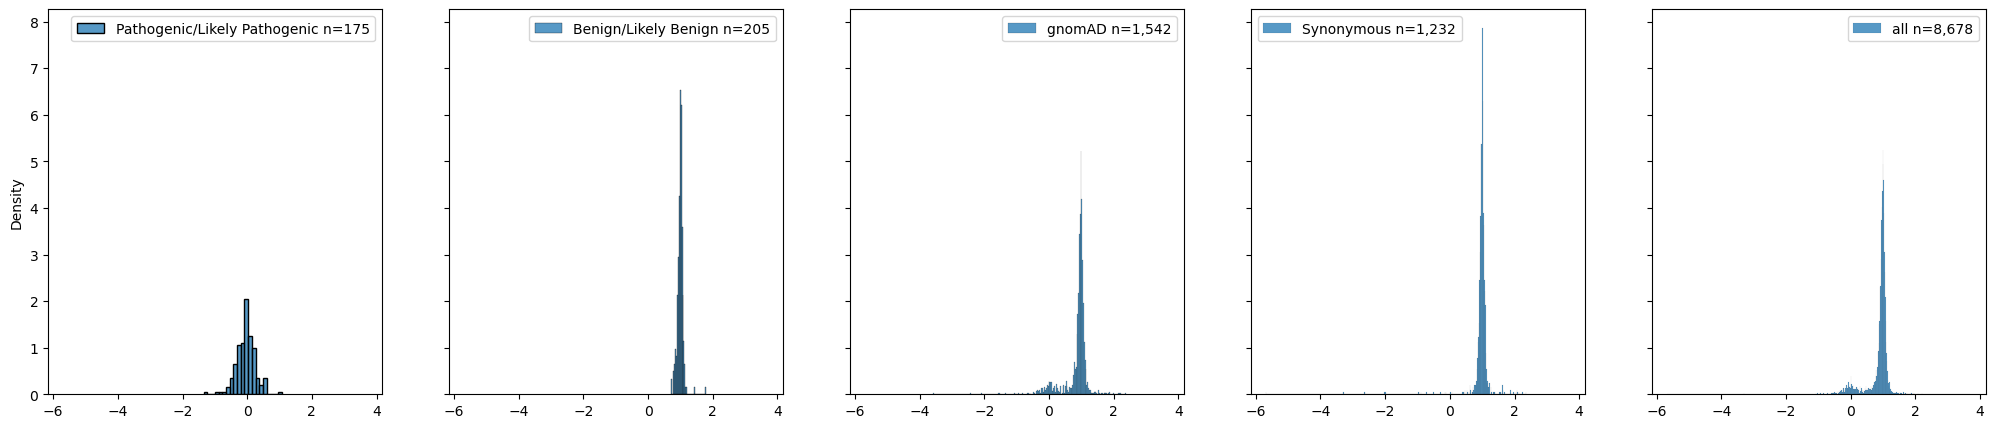

In [6]:
visualize(dataset)